In [1]:
# Import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the dataset
df = pd.read_csv('Stores.csv')
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [3]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
df.isna().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [5]:
df.shape

(896, 5)

In [6]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [7]:
# We dont want the Store ID column as it is not useful for our analysis.
df.drop(['Store ID '],axis=1,inplace=True)
df.head()


,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


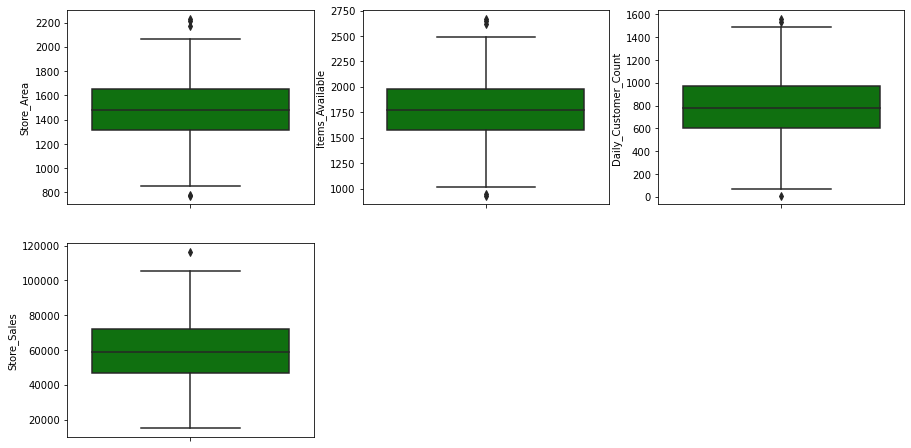

In [8]:
#Lets see the boxplots of all the columns.
i=1
plt.figure(figsize=(15,25))
for feature in df.columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=df[feature],color='green')
    i+=1

<AxesSubplot:>

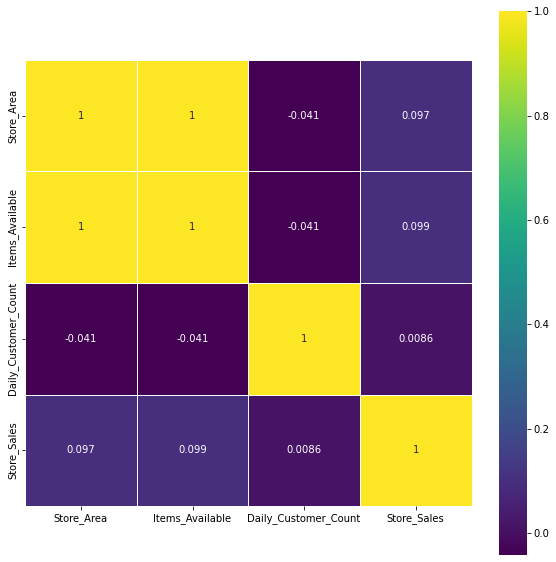

In [9]:
#correlation
correlation = df.corr()
correlation
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlation,linewidths=0.8,annot=True,cmap='viridis',square='True')


In [20]:
#As we can see the Store_Area and Items_Available are completely correlated.This will lead to Multicollinearity.
#Hence we remove the column Store_Area.
correlation= correlation.drop(['Store_Area'],axis=0)

In [21]:
correlation

,Items_Available,Daily_Customer_Count,Store_Sales
Items_Available,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.040978,1.000000,0.008629
Store_Sales,0.098849,0.008629,1.000000


<AxesSubplot:>

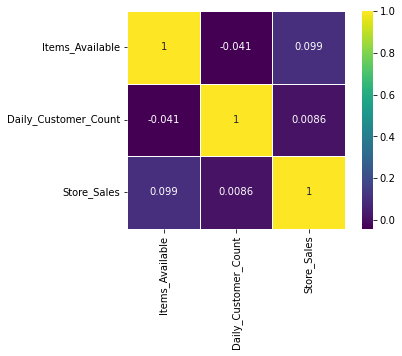

In [22]:
#lest plot the heatmap again to check how it looks.
sns.heatmap(correlation,linewidths=0.8,annot=True,cmap='viridis',square='True')

In [ ]:
#Inferences
# There is not a much of a correlation between these features.
# Very weak correlation is there.


In [ ]:
#Conclusion
#In view of the previous graphs and analyses, the size of the store has no impact on the number of daily customers and turnover. The quantity of items for sale also has no influence on the number of customers and turnover.
#What is certain is that the larger the store, the more items you will find.